In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import Video

import specless as sl
from specless.minigrid.tspenv import TSPEnv  # NOQA

LOG_DIR: Path = Path.cwd().joinpath(".log")
print(str(LOG_DIR))

/home/specless/examples/demo/.log


/home/specless/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/specless/.venv/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


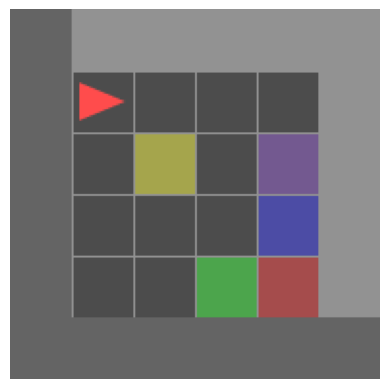

In [2]:
env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.LabelMiniGridWrapper(env, labelkey="label", skiplist=["empty"])
env = sl.SelectStateDataWrapper(env, columns=["label"])

env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [3]:
action_dict = {a.name: a for a in env.actions}
for k, v in action_dict.items():
    print(k, v)

left Actions.left
right Actions.right
forward Actions.forward
pickup Actions.pickup
drop Actions.drop
toggle Actions.toggle
done Actions.done


/home/specless/.venv/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
demonstrations = []

action_strs = [
    "right",
    "forward",
    "left",
    "forward",
    "forward",
    "forward",
    "right",
    "forward",
    "forward",
    "forward",
    "right",
    "forward",
]

states, actions, video_path = sl.simulate(
    env,
    [action_dict[a_s] for a_s in action_strs],
    add_timestamp=True,
    record_video=True,
    video_folder=os.path.join(os.getcwd(), "1"),
)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
demonstrations.append(states)

action_strs = [
    "forward",
    "right",
    "forward",
    "forward",
    "forward",
    "left",
    "forward",
    "forward",
    "left",
    "forward",
    "forward",
]

states, actions, video_path = sl.simulate(
    env,
    [action_dict[a_s] for a_s in action_strs],
    add_timestamp=True,
    record_video=True,
    video_folder=os.path.join(os.getcwd(), "2"),
)
Video(video_path, embed=True, html_attributes="controls muted autoplay loop")
demonstrations.append(states)

In [ ]:
print(demonstrations[0])
print(demonstrations[1])

demonstrations = sl.TPOInferenceAlgorithm.format_timed_traces(demonstrations)

print(demonstrations[0])
print(demonstrations[1])

In [ ]:
inference = sl.TPOInferenceAlgorithm()
columns: list = ["timestamp", "symbol"]
timedtrace_dataset = sl.ArrayDataset(demonstrations, columns)
specification: sl.Specification = inference.infer(timedtrace_dataset)

filepath = os.path.join(LOG_DIR, "tpo.png")
sl.draw_graph(specification, filepath)
print(specification)

In [ ]:
env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.MiniGridTransitionSystemWrapper(env, ignore_direction=True)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [ ]:
synthesizer = sl.TSPSynthesisAlgorithm()

strategy = synthesizer.synthesize(env, specification, num_agent=2)
print(strategy)

In [ ]:
for i, s in enumerate(strategy.strategies):
    states, actions, video_path = sl.simulate(
        env,
        s,
        record_video=True,
        video_folder=os.path.join(LOG_DIR, str(i)),
    )

    Video(video_path, embed=True, html_attributes="controls muted autoplay loop")

In [ ]:
from specless.automaton.pdfa import PDFA

env = gym.make("MiniGrid-TSP-v0", render_mode="rgb_array", seed=3)
env = sl.MiniGridTransitionSystemWrapper(
    env, ignore_direction=True, skip_observations=["unseen", "wall"]
)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

pdfabuilder = sl.PDFABuilder()
pdfa: PDFA = pdfabuilder(os.path.join(os.getcwd(), "pdfa.yaml"))

synthesizer = sl.ProductGraphSynthesisAlgorithm()
strategy = synthesizer.synthesize(env, pdfa)
print(strategy)

# More environments


In [ ]:
ENV_ID = "MiniGrid-TSPBenchmarkEnv-v0"
env = gym.make(
    ENV_ID,
    num_locations=5,
    width=30,
    height=30,
    agent_start_pos=(1, 5),
    render_mode="rgb_array",
)
env = sl.MiniGridTransitionSystemWrapper(env, ignore_direction=True)
for action in env.actions:
    print(action.name)
env.reset()
plt.imshow(env.render())
plt.axis("off")
plt.show()

In [ ]:
algorithm = sl.TSPSynthesisAlgorithm()
strategy = algorithm.synthesize(env, None, num_agent=2)

# synthesizer = sl.TSPSynthesisAlgorithm()
# strategy = synthesizer.synthesize(env, None, num_agent=2)

In [ ]:
for i, s in enumerate(strategy.strategies):
    states, actions, video_path = sl.simulate(
        env,
        s,
        record_video=True,
        video_folder=os.path.join(LOG_DIR, str(i)),
    )

    Video(video_path, embed=True, html_attributes="controls muted autoplay loop")